In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



# The work I have done

I'm doing a project on tomatoes: I have two datasets, from from USDA: http://usda.mannlib.cornell.edu/MannUsda/viewDocumentInfo.do?documentID=1210, one from FAO=: http://www.fao.org/faostat/en/?#data/QC . In the homework I have included both raw files and cleaned files (for USDA, I did the cleaning by hand, ie, copypasted the columns I neede in a separate file etc). From FAO I was able to get a csv with no cleaning needed.

You can read about my findings in the end of this Notebook.

# The USDA file: tomatoes in USA

In [19]:
df = pd.read_csv("usda_tomatoes_cleaned.csv")

In [4]:
df.head()

,year,acres,production
0,1960,180120,19006
1,1961,169730,21121
2,1962,163480,20877
3,1963,164410,20012
4,1964,164140,20527


In [5]:
df.production.dtype


dtype('int64')

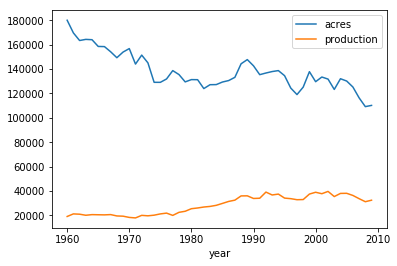

In [6]:
ax = df.plot(x='year')

(0, 40000)

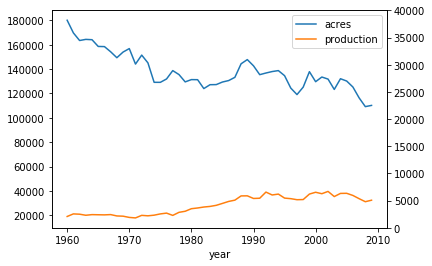

In [7]:
#Not working - production is not on the y scale
ax1 = df.plot(x='year', y='acres')
ax2 = df.plot(x='year', y='production', ax=ax1)
ax2 = ax1.twinx()
ax2.set_ylim(0,40000)

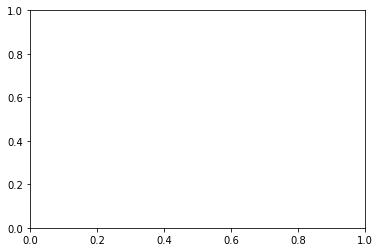

In [8]:
def two_scales(ax1, year, acres, production):
    ax2 = ax1.twinx()

    ax1.plot(year, acres)
    ax1.set_xlabel('year')
    ax1.set_ylabel('acres')

    ax2.plot(year, production)
    ax2.set_ylabel('production')
    return ax1, ax2


# Create some mock data
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
#s2 = np.sin(2 * np.pi * t)


year=df['year']
acres=df['acres']
production=df['production']

# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax1, year, acres, production)


# Change color of each axis
#def color_y_axis(ax, color):
#    """Color your axes."""
#    for t in ax.get_yticklabels():
#        t.set_color(color)
#    return None
#color_y_axis(ax1, 'r')
#color_y_axis(ax2, 'b')
plt.show()

In [9]:
df.head()

,year,acres,production
0,1960,180120,19006
1,1961,169730,21121
2,1962,163480,20877
3,1963,164410,20012
4,1964,164140,20527


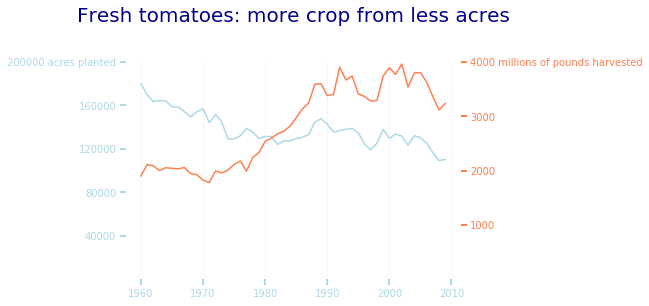

In [17]:
#VÄRIT vielä tarttis
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.year,df.acres, color='lightblue')
ax2.plot(df.year, df.production, color='coral')
ax1.set_ylim(0,180000)
ax2.set_ylim(0,40000)
ax1.tick_params(direction='out', length=6, width=2, colors='lightblue',
                   grid_color='r', grid_alpha=0.5)

ax2.tick_params(direction='out', length=6, width=2, colors='coral',
                   grid_color='r', grid_alpha=0.5)


ax1.spines
#ei toimi nää seuraavat, ei tapahdy mitään
#ax1.set_frame_on(False)
ax2.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)


ax1.set_yticks([40000,80000,120000,160000,200000])
ax1.set_yticklabels([40000,80000,120000,160000,'200000 acres planted'])
ax2.set_yticks([10000,20000,30000,40000])
ax2.set_yticklabels([1000,2000,3000,'4000 millions of pounds harvested'])
#ax.tick_params(which='major', left=False, bottom=False)

ax1.grid(True, axis='x', color='lightgrey', linestyle=':', linewidth=1)
ax1.set_axisbelow(True)

ax1.set_title("Fresh tomatoes: more crop from less acres", pad=40, color='darkblue')
ax1.title.set_fontsize(20)
#ax1.title.set_fontname("Apple Braille")

#ax1.set_xlim(0,81)
#ax1.yaxis.label.set_visible(False)

#ax1.grid(True)
#ax1.set_axisbelow(True)

# Nice to have to the USDA graph:
It would be great to add some info point to the map: 

- a dot on 1994 saying "The first genetically modified food ever, the Flavr Savr tomato, enters the market in 1994 and exits in 1997."
- a dot on in 1980 explaining what happened during the 80s that made such a huge growth possible. (I don't know the reason yet).
- The source information


# The FAO file: Tomatoes all over the world

In [22]:
df2 = pd.read_csv("FAOSTAT_data_7-10-2018.csv")

In [23]:
df2.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,3,Albania,5510,Production,388,Tomatoes,2016,2016,tonnes,284552,NaN,Official data
1,QC,Crops,4,Algeria,5510,Production,388,Tomatoes,2016,2016,tonnes,1280570,NaN,Official data
2,QC,Crops,5,American Samoa,5510,Production,388,Tomatoes,2016,2016,tonnes,71,Im,FAO data based on imputation methodology
3,QC,Crops,7,Angola,5510,Production,388,Tomatoes,2016,2016,tonnes,16240,Im,FAO data based on imputation methodology
4,QC,Crops,8,Antigua and Barbuda,5510,Production,388,Tomatoes,2016,2016,tonnes,511,Im,FAO data based on imputation methodology


In [114]:
df2.Area = df2.Area.str.replace('China, mainland','China')
df2.Area = df2.Area.str.replace('Iran Iran','Iran')
df2.Area = df2.Area.str.replace('United States of America', 'USA')

In [115]:
df_top10 = df2.sort_values("Value", ascending=False).head(10)
df_top10.Value.dtype
df_top10

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
32,QC,Crops,41,China,5510,Production,388,Tomatoes,2016,2016,tonnes,56308914,Im,FAO data based on imputation methodology
74,QC,Crops,100,India,5510,Production,388,Tomatoes,2016,2016,tonnes,18399000,NaN,Official data
168,QC,Crops,231,USA,5510,Production,388,Tomatoes,2016,2016,tonnes,13038410,NaN,Official data
161,QC,Crops,223,Turkey,5510,Production,388,Tomatoes,2016,2016,tonnes,12600000,NaN,Official data
51,QC,Crops,59,Egypt,5510,Production,388,Tomatoes,2016,2016,tonnes,7943285,Im,FAO data based on imputation methodology
80,QC,Crops,106,Italy,5510,Production,388,Tomatoes,2016,2016,tonnes,6437572,NaN,Official data
76,QC,Crops,102,Iran,5510,Production,388,Tomatoes,2016,2016,tonnes,6372633,Im,FAO data based on imputation methodology
145,QC,Crops,203,Spain,5510,Production,388,Tomatoes,2016,2016,tonnes,4671807,Im,FAO data based on imputation methodology
22,QC,Crops,21,Brazil,5510,Production,388,Tomatoes,2016,2016,tonnes,4167629,NaN,Official data
102,QC,Crops,138,Mexico,5510,Production,388,Tomatoes,2016,2016,tonnes,4047171,NaN,Official data


In [116]:
df_top10['Value_miltonnes'] = round(df_top10['Value']/1000000)
df_top10

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Value_miltonnes
32,QC,Crops,41,China,5510,Production,388,Tomatoes,2016,2016,tonnes,56308914,Im,FAO data based on imputation methodology,56.0
74,QC,Crops,100,India,5510,Production,388,Tomatoes,2016,2016,tonnes,18399000,NaN,Official data,18.0
168,QC,Crops,231,USA,5510,Production,388,Tomatoes,2016,2016,tonnes,13038410,NaN,Official data,13.0
161,QC,Crops,223,Turkey,5510,Production,388,Tomatoes,2016,2016,tonnes,12600000,NaN,Official data,13.0
51,QC,Crops,59,Egypt,5510,Production,388,Tomatoes,2016,2016,tonnes,7943285,Im,FAO data based on imputation methodology,8.0
80,QC,Crops,106,Italy,5510,Production,388,Tomatoes,2016,2016,tonnes,6437572,NaN,Official data,6.0
76,QC,Crops,102,Iran,5510,Production,388,Tomatoes,2016,2016,tonnes,6372633,Im,FAO data based on imputation methodology,6.0
145,QC,Crops,203,Spain,5510,Production,388,Tomatoes,2016,2016,tonnes,4671807,Im,FAO data based on imputation methodology,5.0
22,QC,Crops,21,Brazil,5510,Production,388,Tomatoes,2016,2016,tonnes,4167629,NaN,Official data,4.0
102,QC,Crops,138,Mexico,5510,Production,388,Tomatoes,2016,2016,tonnes,4047171,NaN,Official data,4.0


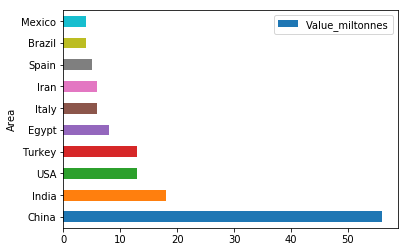

In [117]:
ax_world = df_top10.plot(x='Area', y='Value_miltonnes', kind='barh')

[Text(0,0,'10'),
 Text(0,0,'20'),
 Text(0,0,'30'),
 Text(0,0,'40'),
 Text(0,0,'50 million tons')]

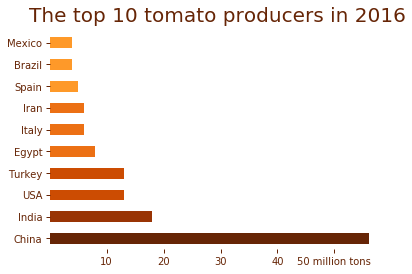

In [118]:
bar_colors = ['#662506','#993404','#cc4c02','#cc4c02', '#ec7014', '#ec7014',  '#ec7014','#fe9929','#fe9929','#fe9929']


ax_world = df_top10.plot(x='Area', y='Value_miltonnes', kind='barh', color=bar_colors, legend=False)

ax_world.spines['top'].set_visible(False)
ax_world.spines['left'].set_visible(False)
ax_world.spines['bottom'].set_visible(False)
ax_world.spines['right'].set_visible(False)

ax_world.set_title("The top 10 tomato producers in 2016", pad=10,  color='#662506')
ax_world.title.set_fontsize(20)


ax_world.tick_params(direction='out', length=4, width=1, colors='#662506',
                   grid_color='#662506', grid_alpha=0.5)

ax_world.yaxis.label.set_visible(False)

ax_world.set_xticks([10,20,30, 40,50])
ax_world.set_xticklabels([10,20,30,40,'50 million tons'])



# Nice to have:

- the exact value of a bar shown in the end of each bar
- the source info


# My findings

The most interesting findings are:

1. There's a huge growth in tomato production in the 1980's even though the land area used to cultivate tomatoes has steadily diminished. What happened in the 80's? Don't know, it cant be GMO since the first GMO food ever came only in 1994. Would be interesting to know, and also it would be interesting to know if this was the case for other procude as well.

2. China is a huge tomato producer. Huge. Didn't know that before this. The production is more than 15 times as big as it was in 1960 in China. The growth is huge. (The growth doesn't show in the bar chart obviously.)

# One question:

In both charts there are same issues related to the scale: while China is so huge, the differences between other countries don't really stand out. And in the US graph there's huge white area in the bottom of the graph. What to do? But I hate breaking the bars or y-axis. So what to do?